#### Import necessary libaries like pandas which is used to read csv,numpy for numerical analysis as well matplotlib and sns for graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read loan csv and keep records having Fully paid or Charged Off status 
loan=pd.read_csv("C:\\Users\\bhavit\\Desktop\\lending_club_case_study\\loan.csv")
loanDf=loan[(loan.loan_status.str.strip() =='Fully Paid') | (loan.loan_status.str.strip() =='Charged Off') ]

C:\Users\bhavit\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#see the number of counts for the original dataframe and filtered dataframe 
print(loan.shape[0])
print(loanDf.shape[0])

39717
38577


In [4]:
#Check not null count of each column to ensure data quality
loanDf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              38577 non-null  int64  
 1    member_id                       38577 non-null  int64  
 2    loan_amnt                       38577 non-null  int64  
 3    funded_amnt                     38577 non-null  int64  
 4    funded_amnt_inv                 38577 non-null  float64
 5    term                            38577 non-null  object 
 6    int_rate                        38577 non-null  object 
 7    installment                     38577 non-null  float64
 8    grade                           38577 non-null  object 
 9    sub_grade                       38577 non-null  object 
 10   emp_title                       36191 non-null  object 
 11   emp_length                      37544 non-null  object 
 12   home_ownership  

In [5]:
loanDf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,...,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,...,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#As we can see around 60 columns having most of the values as null . We can remove them to make data cleaner
loanDf_nonmissing=loanDf[loanDf.columns[loanDf.isnull().mean()<=0.7]]

In [7]:
loanDf_nonmissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [8]:
#Setting to show all columns on jupyter notebbok
pd.set_option('display.max_columns', None)

In [9]:
loanDf_nonmissing.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
#Ensure we do have only Charged off and Fully paid data in the analysis data set
np.unique(loanDf_nonmissing['loan_status'])

array(['Charged Off', 'Fully Paid'], dtype=object)

In [11]:
#We can remove id columns,not required columns as those are not helpful in analysis 
loanDfwoId=loanDf_nonmissing.drop(["id","member_id","url","desc","zip_code","mths_since_last_delinq","addr_state","last_credit_pull_d","tax_liens","emp_title"],axis=1)

In [12]:
loanDfwoId.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [13]:
#impute column emp_length with filling null with 0
loanDfwoId.emp_length.fillna('0',inplace=True)

#impute column pub_rec_bankruptcies with filling 'unknown' category
loanDfwoId.pub_rec_bankruptcies.fillna('unknown',inplace=True)

In [14]:
#Remove Outliers quantile .99
loanDfwoId = loanDfwoId[loanDfwoId["annual_inc"] < loanDfwoId["annual_inc"].quantile(0.99)]

In [15]:
# clean interest rate ,revolt rate by removing % sign as well as clean term
loanDfwoId['int_rate'] = loanDfwoId['int_rate'].str.replace('%','')
loanDfwoId['revol_util'] = loanDfwoId['revol_util'].str.replace('%','')
loanDfwoId['term'] = loanDfwoId['term'].str.replace(' months','')
# Clean emp_length column to have only numbers. 
replace_dict=dict(zip(["years", "year", "\+","<"," "], [""]*5))
loanDfwoId['emp_length']=loanDfwoId['emp_length'].str.strip().replace(replace_dict,regex=True)

In [16]:
# convert amount columns into numeric data.

amt_cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loanDfwoId[amt_cols] = loanDfwoId[amt_cols].apply(pd.to_numeric)

In [17]:
loanDfwoId.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [18]:
loanDfwoId['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38191, dtype: object

In [19]:
#### derive columns from existing columns 
# create month and year columns separately
loanDfwoId['issue_d'] = pd.to_datetime(loanDfwoId.issue_d, format='%b-%y')
loanDfwoId['month'] = loanDfwoId.issue_d.dt.strftime('%b')
loanDfwoId['year']=loanDfwoId['issue_d'].dt.year

# categorise loan amounts into buckets .
loanDfwoId['loan_amnt_cats'] = pd.cut(loanDfwoId['loan_amnt'], [0, 5000, 10000,15000, 20000, 25000, 30000,35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000','25000-30000', '30000 +'])

# categorise annual incomes into buckets 
loanDfwoId['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets 
loanDfwoId['int_rate_cats'] = pd.cut(loanDfwoId['int_rate'], [0, 10, 12.5, 15, 20], labels=['0-10', '10-12.5', '12.5-15', '15 +'])

# categorise dti into buckets .
loanDfwoId['dti_cats'] = pd.cut(loanDfwoId['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

### Start  analysis  on important variable loan status in total loans issued



In [20]:
(loanDfwoId.loan_status.value_counts()*100)/len(loanDfwoId)

Fully Paid     85.378754
Charged Off    14.621246
Name: loan_status, dtype: float64

In [21]:
loanDfwoId.purpose.value_counts(normalize=True)*100


debt_consolidation    46.914194
credit_card           13.058050
other                 10.031159
home_improvement       7.323715
major_purchase         5.574612
small_business         4.511534
car                    3.904061
wedding                2.401089
medical                1.764814
moving                 1.492498
vacation               0.981907
house                  0.934775
educational            0.845749
renewable_energy       0.261842
Name: purpose, dtype: float64

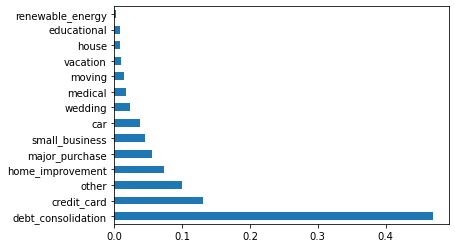

In [22]:
loanDfwoId.purpose.value_counts(normalize=True).plot.barh()
plt.show()

### Numerical variable Univariate analysis:

What is the variation of loan amout,funded amount,total payment

#### loan_amnt analysis :

In [23]:
# Basic statistics with .describe() - Quantitative Variables
loanDfwoId[['loan_amnt']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,loan_amnt
count,38191.000000
mean,10962.265979
std,7266.157660
min,500.000000
5%,2400.000000
10%,3000.000000
25%,5200.000000
50%,9600.000000
75%,15000.000000
90%,21000.000000


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


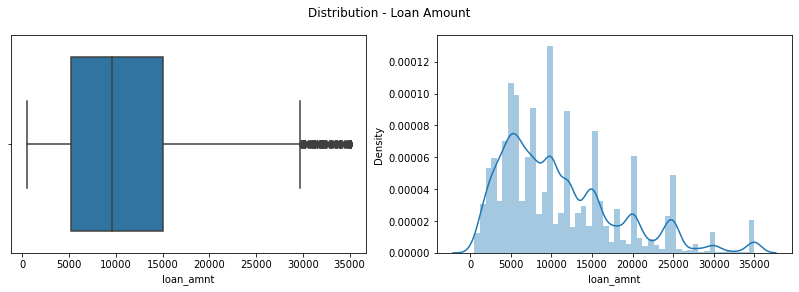

In [24]:
#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of loan amount and identify outliars
plt.subplot(1,2,1)
sns.boxplot(loanDfwoId.loan_amnt)


#Second  plot is distribution plot to see distribution of variable : loan amount
plt.subplot(1,2,2)
sns.distplot(loanDfwoId.loan_amnt)

plt.suptitle('Distribution - Loan Amount')
plt.show()

**Observations**:<br>

From the above plots, we can see that loan amount is varying between 5000 and 15000 for almost 50 % people and median is around 9600.


#### funded_amnt analysis :

In [25]:
loanDfwoId[['funded_amnt']].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,funded_amnt
count,38191.000000
mean,10703.329973
std,7011.076206
min,500.000000
10%,3000.000000
25%,5100.000000
50%,9500.000000
75%,15000.000000
90%,20000.000000
95%,25000.000000


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


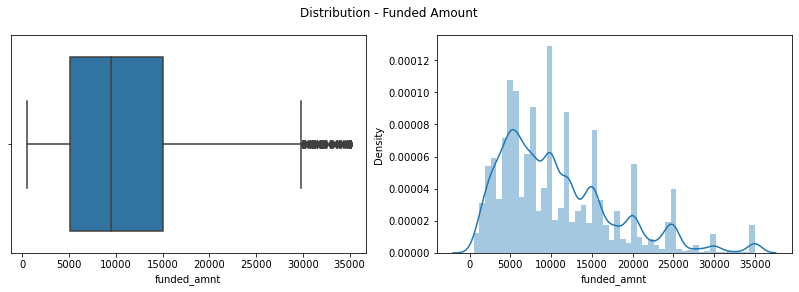

In [26]:
#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of loan amount and identify outliars
plt.subplot(1,2,1)
sns.boxplot(loanDfwoId.funded_amnt)


#Second  plot is distribution plot to see distribution of variable : Funded amount
plt.subplot(1,2,2)
sns.distplot(loanDfwoId.funded_amnt)

plt.suptitle('Distribution - Funded Amount')
plt.show()


**Observations**:<br>
Funded amount data has same distribution as of loan Amount, so we can say that approved loan is almost same as Applied loan amount.

#### total_pymnt analysis :

In [27]:
loanDfwoId.total_pymnt.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38191.000000
mean     11766.742378
std       8696.584695
min          0.000000
10%       2904.035099
25%       5491.732286
50%       9614.180000
75%      15964.295140
90%      23882.193720
95%      29352.551790
99%      40602.222996
max      58563.679930
Name: total_pymnt, dtype: float64

C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_pymnt'>

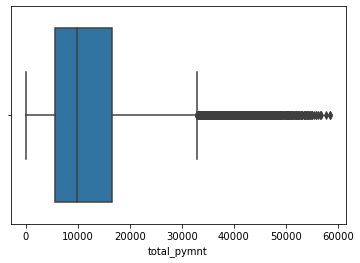

In [28]:
sns.boxplot(loan.total_pymnt)

**Observations**:<br>
Payment amount data shows variation between 6000 and 16000 for 50% people, so we can say that loan having good return  .

#### funded_amnt_inv analysis:
The total amount committed by investors for that loan at that point in time.

In [29]:
# Basic statistics with .describe() -funded_amnt_inv
loanDfwoId[['funded_amnt_inv']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,funded_amnt_inv
count,38191.000000
mean,10146.556380
std,6943.535384
min,0.000000
5%,1800.000000
10%,2800.000000
25%,5000.000000
50%,8575.000000
75%,14000.000000
90%,19975.000000


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


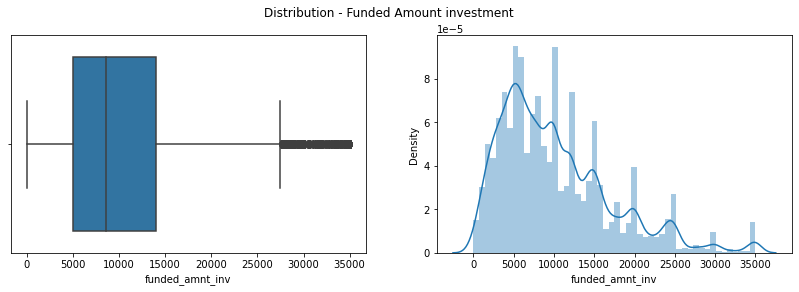

In [30]:
#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of Funded amount investment and identify outliars
plt.subplot(1,2,1)
sns.boxplot(loanDfwoId.funded_amnt_inv)


#Second  plot is distribution plot to see distribution of variable : Funded amount investment
plt.subplot(1,2,2)
sns.distplot(loanDfwoId.funded_amnt_inv)

plt.suptitle('Distribution - Funded Amount investment')
plt.show()

**Observations:**  
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club investors commit total amount same as loan amount i.e. they pass almost all Applied loan amount.

#### Interest Rate analysis:
Interest Rate on the loan distribution amalysis 

In [31]:
# Basic statistics with .describe() - Quantitative Variables
loanDfwoId[['int_rate']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,int_rate
count,38191.000000
mean,11.917876
std,3.684108
min,5.420000
5%,6.170000
10%,7.120000
25%,8.940000
50%,11.710000
75%,14.350000
90%,16.770000


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


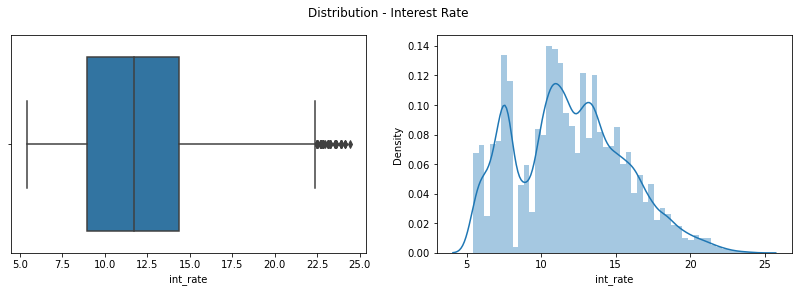

In [32]:
#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of interest rates and identify outliars
plt.subplot(1,2,1)
sns.boxplot(loanDfwoId.int_rate)


#Second  plot is distribution plot to see distribution of variable : interest rate
plt.subplot(1,2,2)
sns.distplot(loanDfwoId.int_rate)

plt.suptitle('Distribution - Interest Rate')
plt.show()

**Observations**:<br>
From the above 2 plots of interest rates we can conclude that most of the interest rates lies are in the range of **9% to 14.5%**. There are some exceptions/outliars  i.e., **22.5+** %

#### Installment Analysis :
The monthly payment owed by the borrower.

In [33]:
loanDfwoId[['installment']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,installment
count,38191.000000
mean,319.938941
std,205.948407
min,15.690000
5%,70.240000
10%,98.920000
25%,165.380000
50%,276.300000
75%,421.800000
90%,613.460000


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


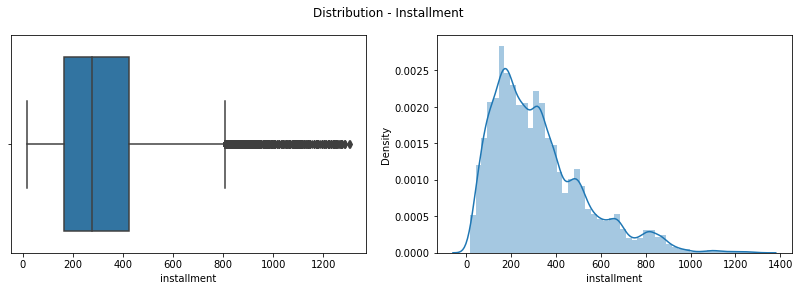

In [34]:
#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of installments and identify outliars
plt.subplot(1,2,1)
sns.boxplot(loanDfwoId.installment)


#Second  plot is distribution plot to see distribution of variable : installment
plt.subplot(1,2,2)
sns.distplot(loanDfwoId.installment)

plt.suptitle('Distribution - Installment')
plt.show()


**Observations**:<br>
As we can see most of the installments is between 160 and 420. Median is around 270 which is the true representative of installment value.

#### Annual income analysis : 
The self-reported annual income provided by the borrower during registration.

In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
loanDfwoId[['annual_inc']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,annual_inc
count,38191.000
mean,65313.610
std,35150.773
min,4000.000
5%,24000.000
10%,30000.000
25%,40000.000
50%,58000.000
75%,80232.000
90%,111000.000


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


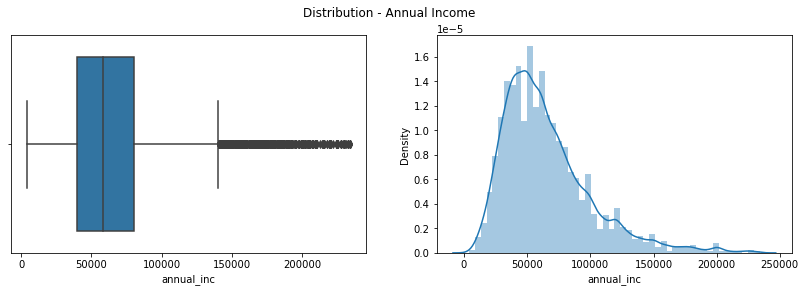

In [36]:

#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of installments and identify outliars
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(loanDfwoId.annual_inc)


#Second  plot is distribution plot to see distribution of variable : installment
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(loanDfwoId.annual_inc)

plt.suptitle('Distribution - Annual Income')
plt.show()

**Observations**:<br>
Data observation : As we can see median is around 58000 and average is 68000. So there are sone annual income values which is impacting overall average.
Business observation : Most of the people having annual income between 40k and 80K.

#### dti anlysis : 


In [37]:
loanDfwoId[['dti']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,dti
count,38191.000
mean,13.333
std,6.658
min,0.000
5%,2.160
10%,4.130
25%,8.210
50%,13.430
75%,18.600
90%,22.310


C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


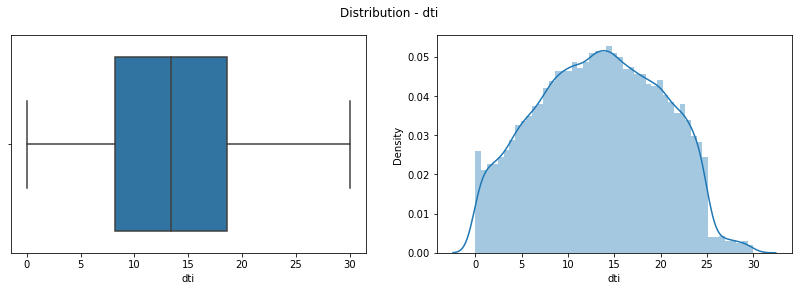

In [38]:

#Configuring figure size to populate grpahs
plt.figure(figsize=(14,4))

#First plot is box plot to see range of installments and identify outliars
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(loanDfwoId.dti)


#Second  plot is distribution plot to see distribution of variable : installment
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(loanDfwoId.dti)

plt.suptitle('Distribution - dti')
plt.show()

**Observations**:<br>
As you can see dti is between 2 and 30 . So its a healthy sign that loan is disbursed to good saving people so that loan defualters can be less.

#### grade analysis:

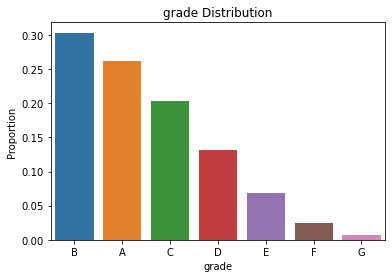

In [39]:
#Percentage of each values
prob_df = loanDfwoId['grade'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y="grade", data=prob_df)
plt.xlabel("grade")
plt.ylabel('Proportion')
plt.title('grade'+' Distribution')
plt.show()

**Observations**: 
As you can see most of the borrower having B and A grades.

#### Employment length analysis : 
Employment length seems to be most important length so we will further anlyse it see distribution of it

In [40]:
loanDfwoId[['emp_length']].head(1)

,emp_length
0,10


In [41]:
loanDfwoId[['emp_length']].dtypes

emp_length    int64
dtype: object

In [42]:
loanDfwoId['emp_length']=loanDfwoId['emp_length'].astype('float')

In [43]:
loanDfwoId[['emp_length']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,emp_length
count,38191.000
mean,4.916
std,3.451
min,0.000
5%,1.000
10%,1.000
25%,2.000
50%,4.000
75%,9.000
90%,10.000


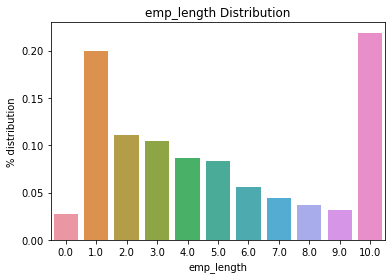

In [44]:
disttributionDf = loanDfwoId['emp_length'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='emp_length', data=disttributionDf)
plt.xlabel('emp_length')
plt.ylabel('% distribution')
plt.title('emp_length Distribution')
plt.show()

In [45]:
disttributionDf.head()

,index,emp_length
0,10.000,0.219
1,1.000,0.200
2,2.000,0.111
3,3.000,0.104
4,4.000,0.087


**Observations**:
As you can see around 22% borowers having 10+ years of experience and around 20 % having  <=1 years of experience. 
So loan distribution is not specifically for higher employment length.

#### Home Ownership Analysis:

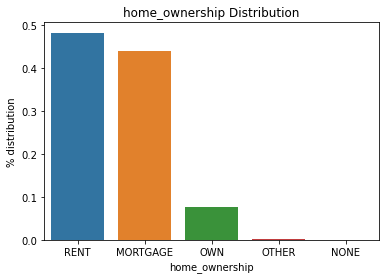

In [46]:
#Percentage of each values
distributionDf = loanDfwoId['home_ownership'].value_counts(normalize=True).reset_index()
#Plotting percentage distribution vs home ownership
sns.barplot(x='index', y='home_ownership', data=distributionDf)
plt.xlabel('home_ownership')
plt.ylabel('% distribution')
plt.title('home_ownership Distribution')
plt.show()

**Observations**:
As you can see most of the borrowers either living in rented house or houses which are used as securities in loans. Only 10 % applicant with OWN house . i.e. people with own house requires less loan due to financial stability

#### Verification Status analysis

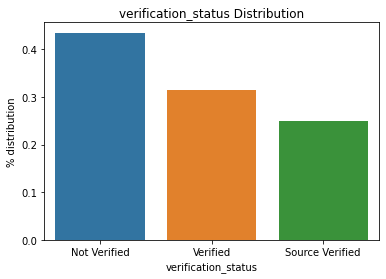

In [47]:

#Percentage of each values
distributionDf = loanDfwoId['verification_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='verification_status', data=distributionDf)
plt.xlabel('verification_status')
plt.ylabel('% distribution')
plt.title('verification_status Distribution')
plt.show()

**Observations**:
40 % of the loans distributed without verification of applicant income.It can be the reason of higher NPA in future.

## Segmented Univariate Analysis

#### Loan Amount Analysis:

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

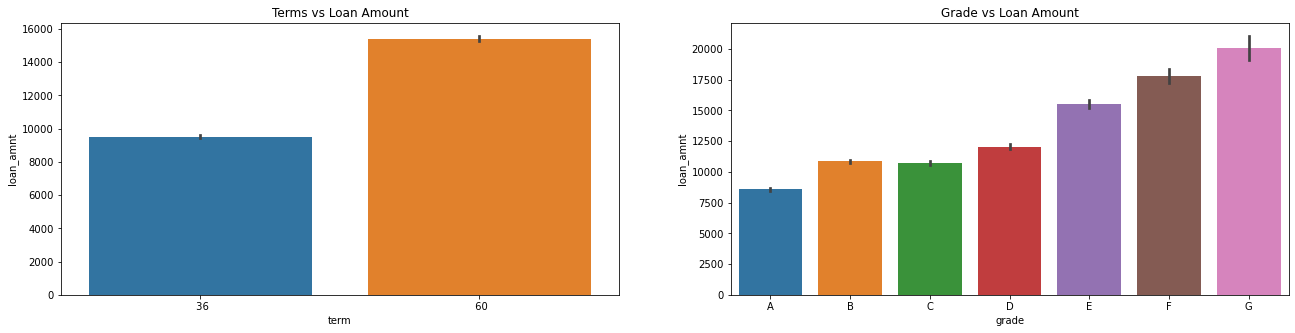

In [48]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.barplot(x='term', y=loanDfwoId.loan_amnt, data=loanDfwoId)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loanDfwoId.grade.unique()
grade_ord.sort()
sns.barplot(x='grade', y=loanDfwoId.loan_amnt, order = grade_ord, data=loanDfwoId)

**Observations**:As you can see Higher amount loans have high term. Grade 'G' and 'F' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<AxesSubplot:title={'center':'home_ownership vs Loan Amount'}, xlabel='home_ownership', ylabel='loan_amnt'>

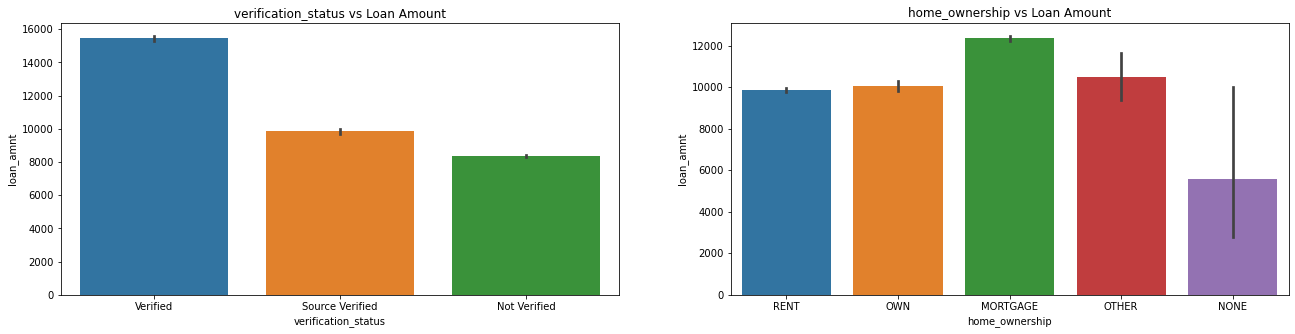

In [49]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.barplot(x='verification_status', y=loanDfwoId.loan_amnt, data=loanDfwoId)
plt.title('verification_status vs Loan Amount')
plt.subplot(122)
plt.title('home_ownership vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord.sort()
sns.barplot(x='home_ownership', y=loanDfwoId.loan_amnt, data=loanDfwoId)

**Observations**:As you can see verified applicants have higher loans. Also Mortgage category having higher loan amount.

Text(0.5, 1.0, 'loan_status vs Loan Amount')

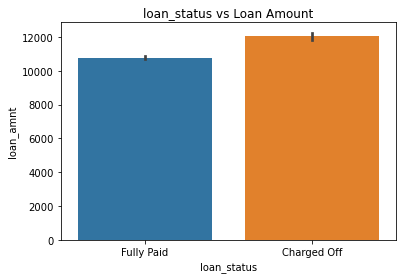

In [50]:
sns.barplot(x='loan_status', y=loanDfwoId.loan_amnt, data=loanDfwoId)
plt.title('loan_status vs Loan Amount')

**Observations**:As you can see defualters have higher loan amount compared to Fully paid.

Text(0.5, 1.0, 'purpose vs Loan Amount')

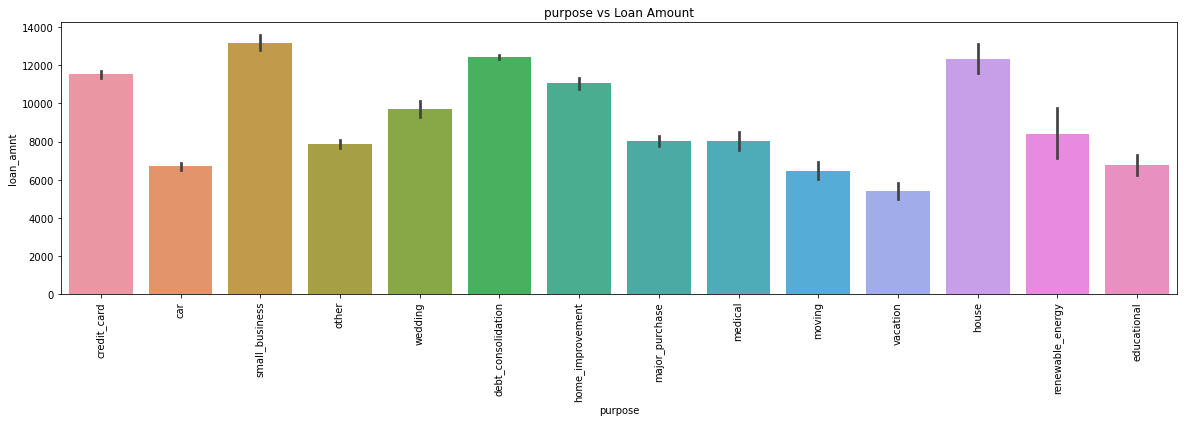

In [51]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y=loanDfwoId.loan_amnt, data=loanDfwoId)
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

**Observations**:As you can see small_business and house purchase have higher loan amount.

### int_rate analysis:

<AxesSubplot:title={'center':'Grade vs Interest rates'}, xlabel='grade', ylabel='int_rate'>

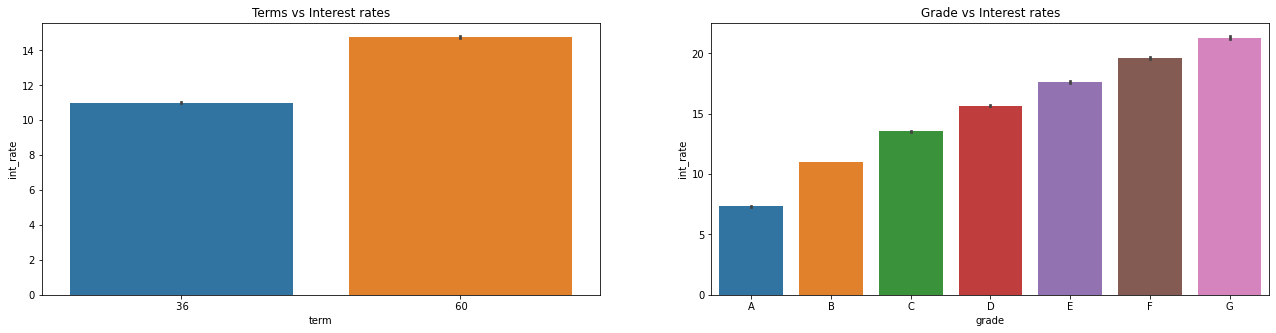

In [52]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.barplot(x='term', y=loanDfwoId.int_rate, data=loanDfwoId)
plt.title('Terms vs Interest rates')
plt.subplot(122)
plt.title('Grade vs Interest rates')
#Finding grades with sorted alphabetical order
grade_ord = loanDfwoId.grade.unique()
grade_ord.sort()
sns.barplot(x='grade', y=loanDfwoId.int_rate, order = grade_ord, data=loanDfwoId)

**Observations**:
* Higher term having high interest rates. Lower grades having higher interest rates.

<AxesSubplot:title={'center':'home_ownership vs Interest rates'}, xlabel='home_ownership', ylabel='int_rate'>

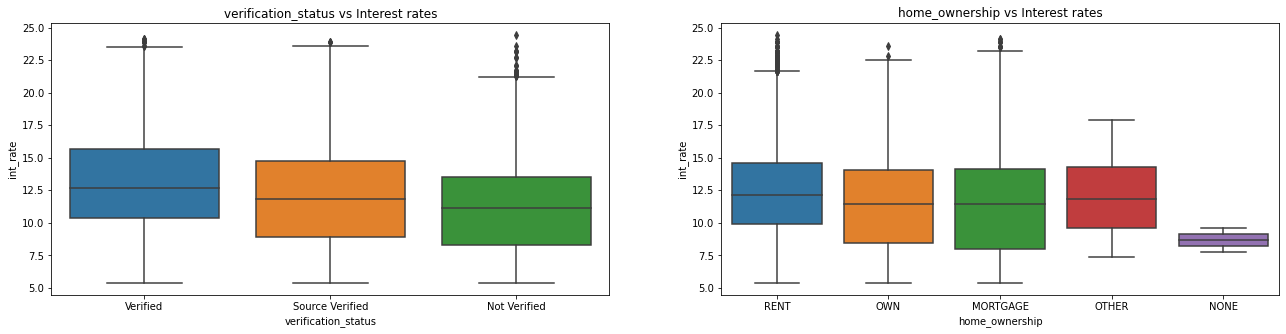

In [53]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y=loanDfwoId.int_rate, data=loanDfwoId)
plt.title('verification_status vs Interest rates')
plt.subplot(122)
plt.title('home_ownership vs Interest rates')
#Finding grades with sorted alphabetical order
grade_ord.sort()
sns.boxplot(x='home_ownership', y=loanDfwoId.int_rate, data=loanDfwoId)

**Observations**:
* There is a small variation in interest rates for different categories of verification status.  
* For Mortgage category of home ownership we do have lower interest rates.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

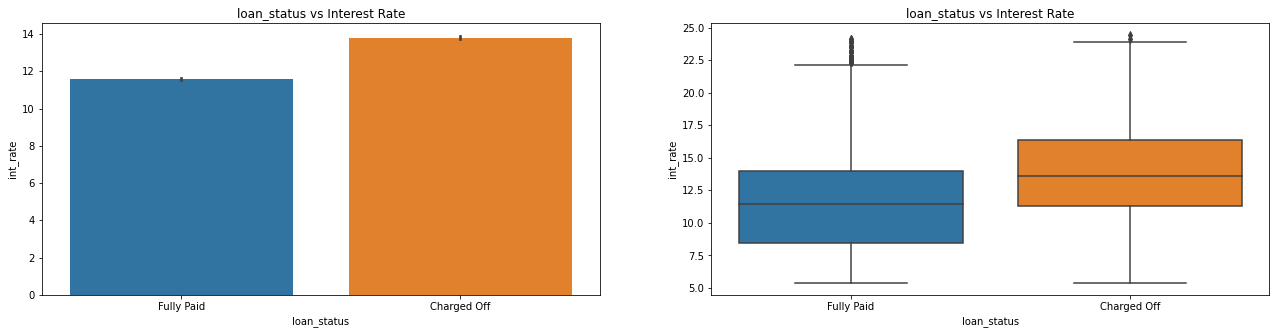

In [54]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.barplot(x='loan_status', y=loanDfwoId.int_rate, data=loanDfwoId)
plt.title('loan_status vs Interest Rate')
plt.subplot(122)
sns.boxplot(x='loan_status', y=loanDfwoId.int_rate, data=loanDfwoId)
plt.title('loan_status vs Interest Rate')

**Observations**:
* Most defualters had high interest rates.

Text(0.5, 1.0, 'purpose vs Interest Rate')

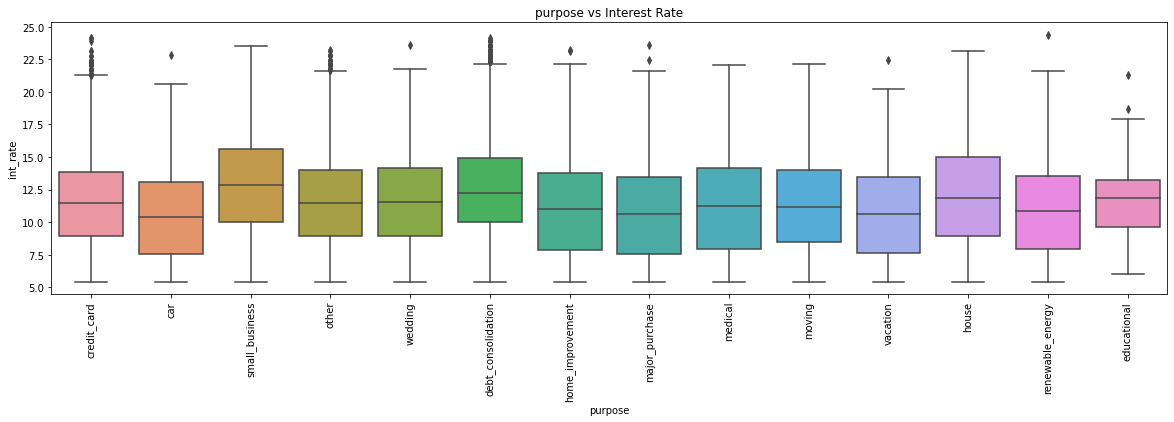

In [55]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loanDfwoId.int_rate, data=loanDfwoId)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

**Observations**:
* small business purpose has highest interest rates, where as vehicle loan segment has lowest interest rates.

### annual_inc analysis

<AxesSubplot:title={'center':'Grade vs Annual income'}, xlabel='grade', ylabel='annual_inc'>

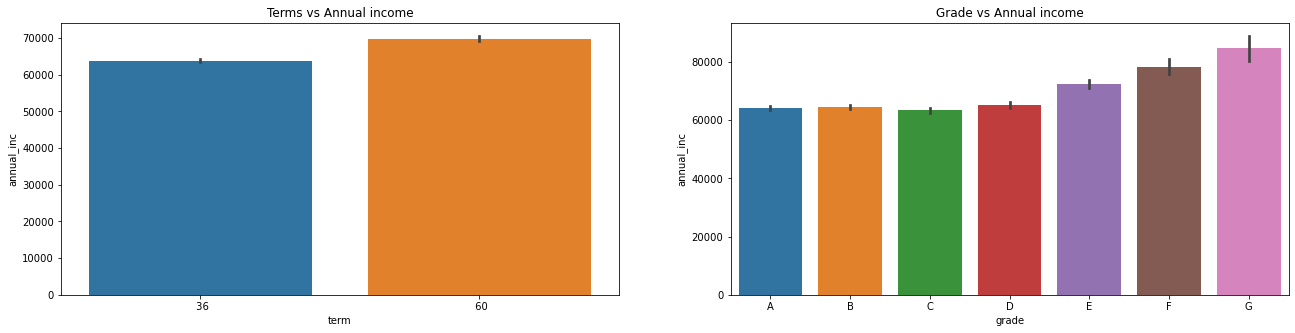

In [56]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.barplot(x='term', y=loanDfwoId.annual_inc, data=loanDfwoId)
plt.title('Terms vs Annual income')
plt.subplot(122)
plt.title('Grade vs Annual income')
#Finding grades with sorted alphabetical order
grade_ord = loanDfwoId.grade.unique()
grade_ord.sort()
sns.barplot(x='grade', y=loanDfwoId.annual_inc, order = grade_ord, data=loanDfwoId)

**Observations**:
* strange behaviour in above graph as you can see lower grades has higher annual income

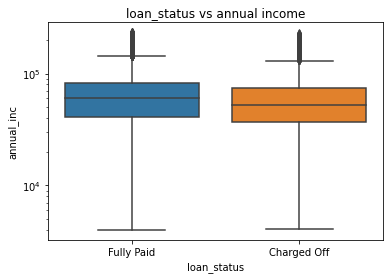

In [57]:
sns.boxplot(x='loan_status', y=loanDfwoId.annual_inc, data=loanDfwoId)
plt.title('loan_status vs annual income')
plt.yscale('log')

**Observations:**    
* Charged off category having slightly lower annual income but its not very significant

### DTI analysis:
Debt to Income Ratio. Its the most important feature variable as per above analysis. we will se its behaviour compared to other variables

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

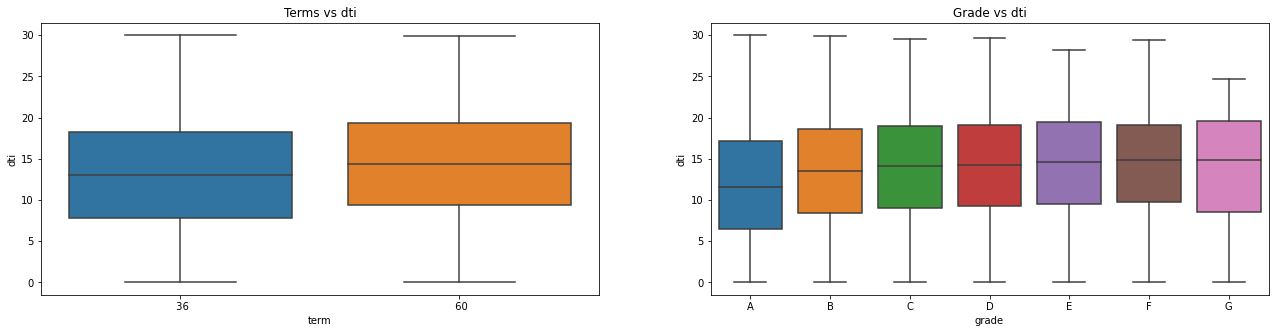

In [58]:
plt.figure(figsize=(22,5))
plt.subplot(121)
sns.boxplot(x='term', y=loanDfwoId.dti, data=loanDfwoId)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
ordergrade = loanDfwoId.grade.unique()
ordergrade.sort()
sns.boxplot(x='grade', y=loanDfwoId.dti, order = ordergrade, data=loanDfwoId)

**Observations:**    
* debt to income ratio is lower for lower loan duration or we say with lower dti applicants mostly take lower duration loans.
* As dti increasing grading is decreasing (from A to G) so higher dti means lower grading from above data snapshot

Text(0.5, 1.0, 'loan_status vs dti')

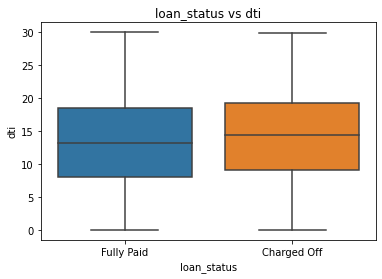

In [59]:
sns.boxplot(x='loan_status', y=loanDfwoId.dti, data=loanDfwoId)
plt.title('loan_status vs dti')

**Observations:**    
* Higher dti is converting applicant to defulter category.i.e. Borrowers with high DTI has more probability to default

Text(0.5, 1.0, 'purpose vs dti')

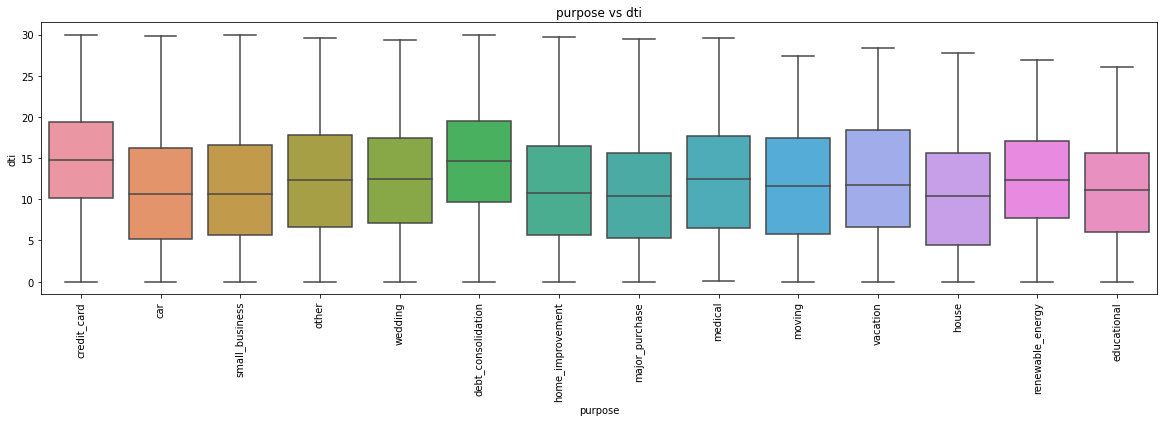

In [60]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loanDfwoId.dti, data=loanDfwoId)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

**Observations**:  
* credit card and debt consolidation purpose has more DTI than other purposes.

### pub_rec_bankruptcies
Number of public record bankruptcies

C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhavit\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Grade vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

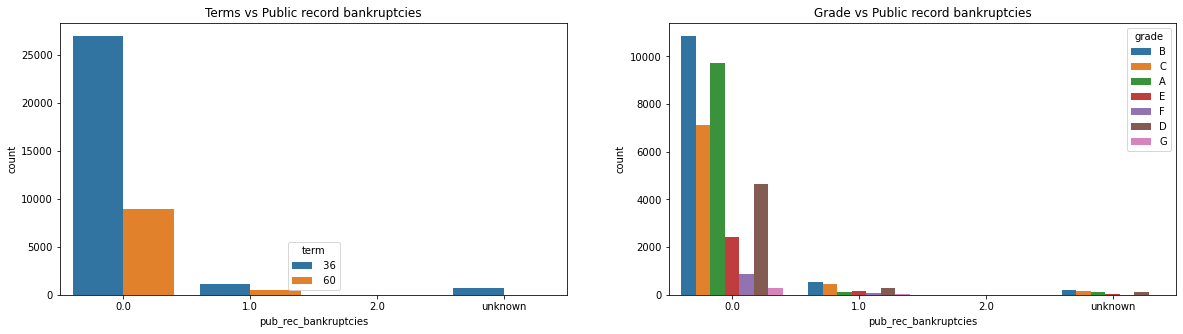

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(loanDfwoId.pub_rec_bankruptcies, hue='term', data=loanDfwoId)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = loanDfwoId.grade.unique()
grade_ord.sort()
sns.countplot(loanDfwoId.pub_rec_bankruptcies, hue='grade', data=loanDfwoId)

## Bivariate Analysis:

In [62]:
loanDfwoId.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'month', 'year', 'loan_amnt_cats',
       'annual_inc_cats', 'int_rate_cats', 'dti_cats'],
      dtype='object')

### Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

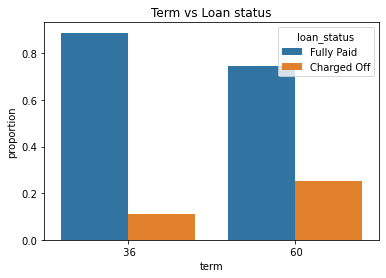

In [63]:
#% of distribution of values for each category
df = loanDfwoId.groupby(['term', 'loan_status'], as_index=False)['loan_amnt'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

**Observations**:  
* % defualter borrowers in 60 months term are more then 36 months. 
* Fully Paid rate is higher in 36 months tenure.

### Bivariate analysis between annual income category and default %

In [64]:
inc_bucket_vs_loan = loanDfwoId.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_bucket_vs_loan['Total'] = inc_bucket_vs_loan['Charged Off'] + inc_bucket_vs_loan['Fully Paid'] 
inc_bucket_vs_loan['defualt_prop'] = inc_bucket_vs_loan['Charged Off'] / inc_bucket_vs_loan['Total']
inc_bucket_vs_loan.sort_values('defualt_prop', ascending=False)

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,defualt_prop
0,0-20000,237,943,1180,0.201
1,20000-40000,1514,7004,8518,0.178
2,40000-60000,1729,9534,11263,0.154
3,60000-80000,1024,6597,7621,0.134
4,80000 +,1080,8529,9609,0.112


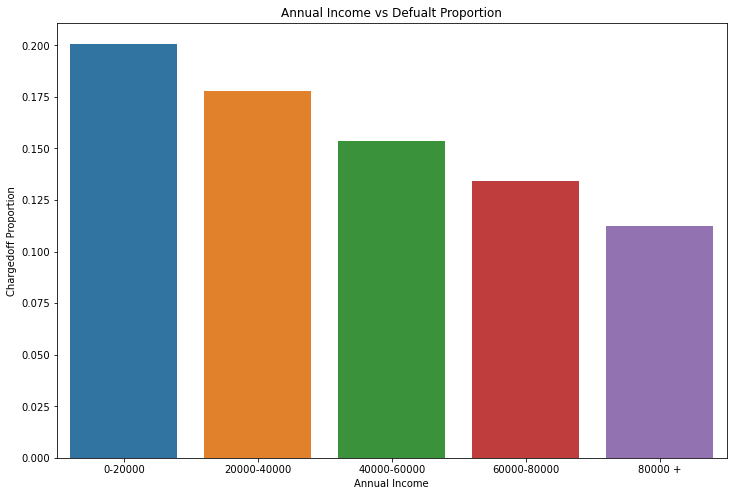

In [65]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='annual_inc_cats', y='defualt_prop', data=inc_bucket_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=10)
ax1.set_xlabel('Annual Income',fontsize=10)
plt.show()


**Observation**
* As you can see higher annual income people have lesser defaults 

### Bivariate analysis between purpose category and default proportion

In [66]:
purpose_vs_loan = loanDfwoId.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['defualt_prop'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('defualt_prop', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,defualt_prop
11,small_business,472,1251,1723,0.274
10,renewable_energy,19,81,100,0.190
3,educational,55,268,323,0.170
9,other,629,3202,3831,0.164
5,house,58,299,357,0.162
8,moving,91,479,570,0.160
7,medical,106,568,674,0.157
2,debt_consolidation,2752,15165,17917,0.154
12,vacation,53,322,375,0.141
4,home_improvement,338,2459,2797,0.121


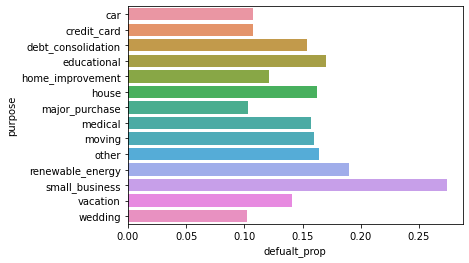

In [71]:
plot=sns.barplot(y='purpose', x='defualt_prop', data=purpose_vs_loan)

**Observation**
* small business has higher chances to defult the loan and next is renewable energy  

### Bivariate analysis between interest rate category and default proportion

In [68]:
loanDfwoId.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,month,year,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,5000,5000,4975.000,36,10.650,162.870,B,B2,10.000,RENT,24000.000,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,27.650,0,Jan-85,1,3,0,13648,83.70,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,0.000,1,INDIVIDUAL,0,0.000,0,0.000,Dec,2011,0-5000,20000-40000,10-12.5,NaN
1,2500,2500,2500.000,60,15.270,59.830,C,C4,1.000,RENT,30000.000,Source Verified,2011-12-01,Charged Off,n,car,bike,1.000,0,Apr-99,5,3,0,1687,9.40,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,0.000,1,INDIVIDUAL,0,0.000,0,0.000,Dec,2011,0-5000,20000-40000,15 +,0-5


In [69]:
intrt_vs_loan = loanDfwoId.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intrt_vs_loan['Total'] = intrt_vs_loan['Charged Off'] + intrt_vs_loan['Fully Paid'] 
intrt_vs_loan['defualt_prop'] = intrt_vs_loan['Charged Off'] / intrt_vs_loan['Total']
intrt_vs_loan.sort_values('defualt_prop', ascending=False)

loan_status,int_rate_cats,Charged Off,Fully Paid,Total,defualt_prop
3,15 +,1775,5349,7124,0.249
2,12.5-15,1470,7321,8791,0.167
1,10-12.5,1224,8083,9307,0.132
0,0-10,825,11402,12227,0.067


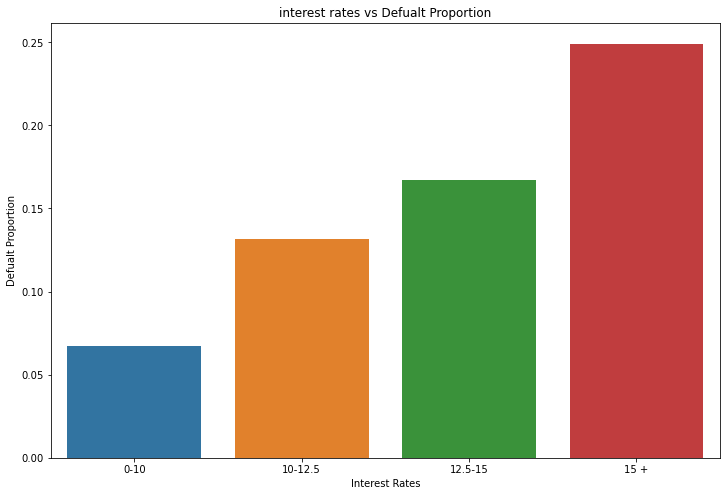

In [73]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('interest rates vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='int_rate_cats', y='defualt_prop', data=intrt_vs_loan)
ax1.set_ylabel('Defualt Proportion',fontsize=10)
ax1.set_xlabel('Interest Rates',fontsize=10)
plt.show()


**Observation**
* Higher Interest rates has higher chances to defult the loan

### Bivariate analysis between employment length category and default proportion

In [74]:
emplength_vs_loan = loanDfwoId.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplength_vs_loan['Total'] = emplength_vs_loan['Charged Off'] + emplength_vs_loan['Fully Paid'] 
emplength_vs_loan['defualt_prop'] = emplength_vs_loan['Charged Off'] / emplength_vs_loan['Total']
emplength_vs_loan.sort_values('defualt_prop', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,defualt_prop
0,0.000,227,801,1028,0.221
10,10.000,1316,7038,8354,0.158
7,7.000,262,1435,1697,0.154
5,5.000,456,2712,3168,0.144
8,8.000,203,1216,1419,0.143
1,1.000,1090,6532,7622,0.143
6,6.000,305,1846,2151,0.142
3,3.000,551,3426,3977,0.139
4,4.000,456,2859,3315,0.138
2,2.000,561,3684,4245,0.132


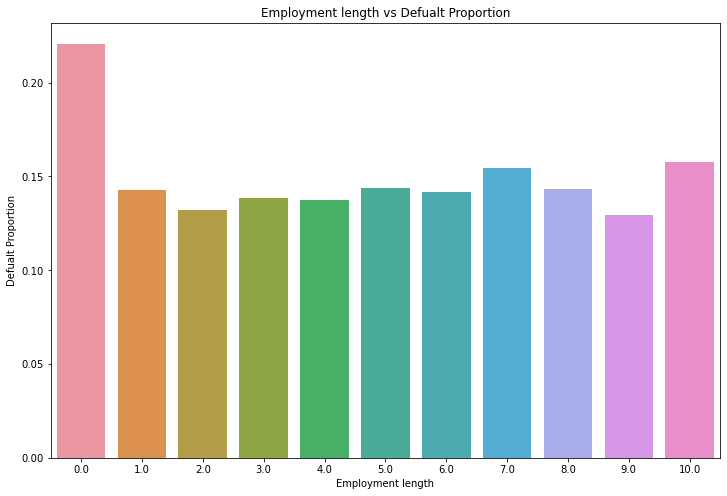

In [75]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment length vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='emp_length', y='defualt_prop', data=emplength_vs_loan)
ax1.set_ylabel('Defualt Proportion',fontsize=10)
ax1.set_xlabel('Employment length',fontsize=10)
plt.show()

**Observation**
* Minimum and maximum employment length has maximum defualt proportion

### Bivariate analysis between dti category and default proportion

In [76]:
dti_vs_loan = loanDfwoId.groupby(['dti_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Fully Paid'] 
dti_vs_loan['defualt_prop'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('defualt_prop', ascending=False)

loan_status,dti_cats,Charged Off,Fully Paid,Total,defualt_prop
4,25+,1116,5455,6571,0.170
3,15-20,1385,7399,8784,0.158
2,10-15,1392,8164,9556,0.146
1,05-10,996,6749,7745,0.129
0,0-5,580,4157,4737,0.122


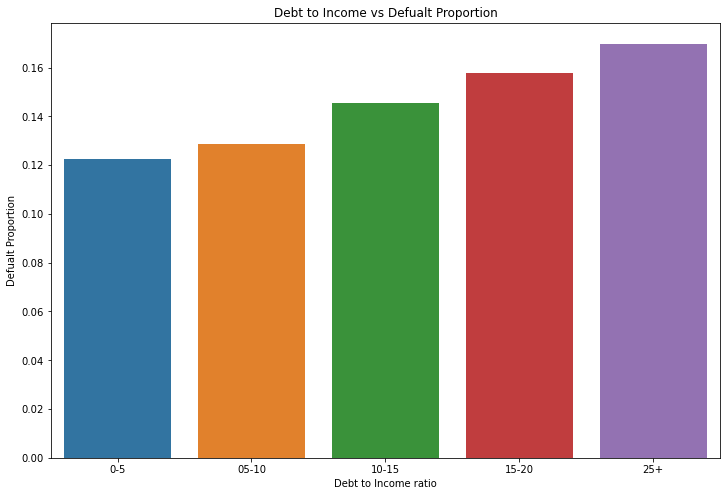

In [77]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Debt to Income vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='dti_cats', y='defualt_prop', data=dti_vs_loan)
ax1.set_ylabel('Defualt Proportion',fontsize=10)
ax1.set_xlabel('Debt to Income ratio',fontsize=10)
plt.show()

**Observation**
* Higher DTI (Debt to Income) has higher chances to defualt

### Bivariate analysis between verification category and default proportion

In [78]:
loanDfwoId.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'month', 'year', 'loan_amnt_cats',
       'annual_inc_cats', 'int_rate_cats', 'dti_cats'],
      dtype='object')

In [79]:
verification_vs_loan = loanDfwoId.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_vs_loan['Total'] = verification_vs_loan['Charged Off'] + verification_vs_loan['Fully Paid'] 
verification_vs_loan['defualt_prop'] = verification_vs_loan['Charged Off'] / verification_vs_loan['Total']
verification_vs_loan.sort_values('defualt_prop', ascending=False)




loan_status,verification_status,Charged Off,Fully Paid,Total,defualt_prop
2,Verified,2032,9999,12031,0.169
1,Source Verified,1422,8134,9556,0.149
0,Not Verified,2130,14474,16604,0.128


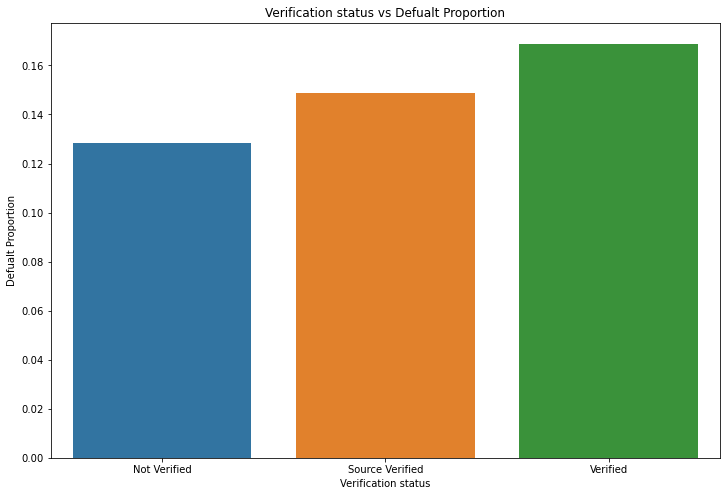

In [80]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification status vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='verification_status', y='defualt_prop', data=verification_vs_loan)
ax1.set_ylabel('Defualt Proportion',fontsize=10)
ax1.set_xlabel('Verification status',fontsize=10)
plt.show()

**Observation**
* Very strange behaviour as verified applicant has higher defualt % . Or it can be like high risk people are generaally verified 

### Bivariate analysis between public record bankcorrpt category and default proportion

In [82]:
bankcrpt_vs_loan = loanDfwoId.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankcrpt_vs_loan['Total'] = bankcrpt_vs_loan['Charged Off'] + bankcrpt_vs_loan['Fully Paid'] 
bankcrpt_vs_loan['defualt_prop'] = bankcrpt_vs_loan['Charged Off'] / bankcrpt_vs_loan['Total']
bankcrpt_vs_loan.sort_values('defualt_prop', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,defualt_prop
2,2.000,2,3,5,0.400
1,1.000,365,1268,1633,0.224
3,unknown,116,572,688,0.169
0,0.000,5101,30764,35865,0.142


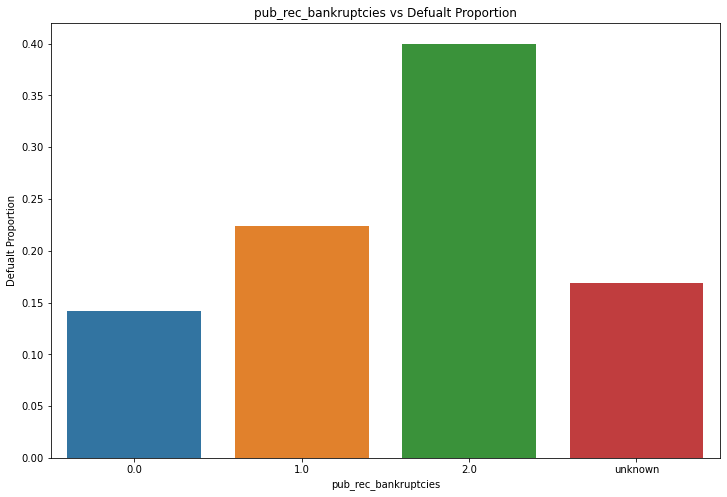

In [83]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('pub_rec_bankruptcies vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='pub_rec_bankruptcies', y='defualt_prop', data=bankcrpt_vs_loan)
ax1.set_ylabel('Defualt Proportion',fontsize=10)
ax1.set_xlabel('pub_rec_bankruptcies',fontsize=10)
plt.show()

**Observation**
* Higher the number of public record bankruptcies , higher the chances of fefault

### Bivariate analysis between grade category and default proportion

In [86]:
grade_vs_loan = loanDfwoId.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['defualt_prop'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('defualt_prop', ascending=False)



loan_status,grade,Charged Off,Fully Paid,Total,defualt_prop
6,G,99,190,289,0.343
5,F,312,642,954,0.327
4,E,704,1906,2610,0.270
3,D,1112,3915,5027,0.221
2,C,1342,6411,7753,0.173
1,B,1414,10167,11581,0.122
0,A,601,9376,9977,0.060


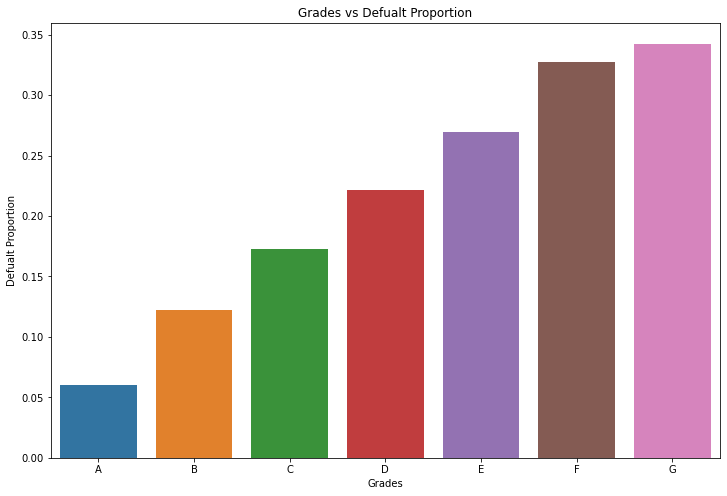

In [87]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Grades vs Defualt Proportion',fontsize=12,)
ax1=sns.barplot(x='grade', y='defualt_prop', data=grade_vs_loan)
ax1.set_ylabel('Defualt Proportion',fontsize=10)
ax1.set_xlabel('Grades',fontsize=10)
plt.show()

**Observation**
* Lower the grade , higher the chances of fefault

### Overall correlation between important numeric feature columns

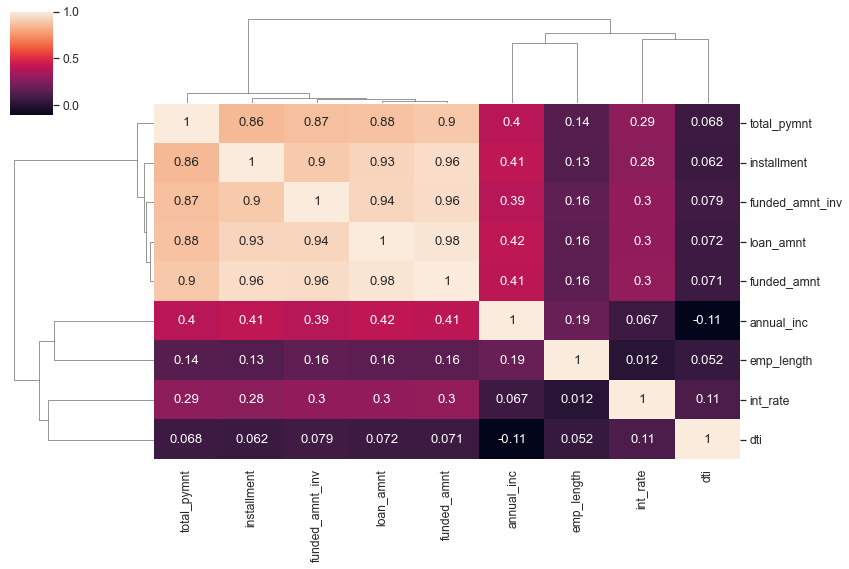

In [89]:
# Heatmap to show closeness among numerical variables.
loan_correlation = loanDfwoId[['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']].corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8))
plt.show()


 **Observation** 
 * Loan amount, investor amount, funding amount are strongly correlated.
 * emp_length has less correlation with loan amount which is surprsing either it should be less or high
 * DTI has negative correlation with annual income.
 * annual income and loan amount are positive correlated i.e. Higher annual income has higher loam amount approved.
 * emp_lenth and annual income are not strongly correlated which is surprsing
